# 6.1

In [5]:
import gensim.downloader as api

# Tải mô hình GloVe từ Gensim
glove_model = api.load("glove-wiki-gigaword-100")

# Truy cập biểu diễn của từ 'king'
word_vector = glove_model['king']

# Tìm các từ tương tự với 'king'
similar_words = glove_model.most_similar('king', topn=5)

# In biểu diễn của từ 'king' và các từ tương tự
print("Biểu diễn của từ 'king':\n", word_vector)
print("Các từ tương tự:", similar_words)


Biểu diễn của từ 'king':
 [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.41394  -1.3363   -0.61915  -0.33089  -0

# 6.2

[[18, 41], [47, 7], [20, 12], [20, 7], [31], [1], [39, 12], [36, 47], [39, 7], [5, 11, 41, 1]]
[[18 41  0  0]
 [47  7  0  0]
 [20 12  0  0]
 [20  7  0  0]
 [31  0  0  0]
 [ 1  0  0  0]
 [39 12  0  0]
 [36 47  0  0]
 [39  7  0  0]
 [ 5 11 41  1]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Accuracy: 80.00%


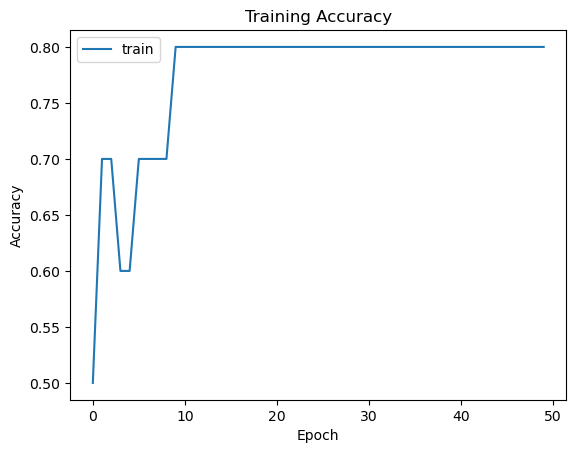

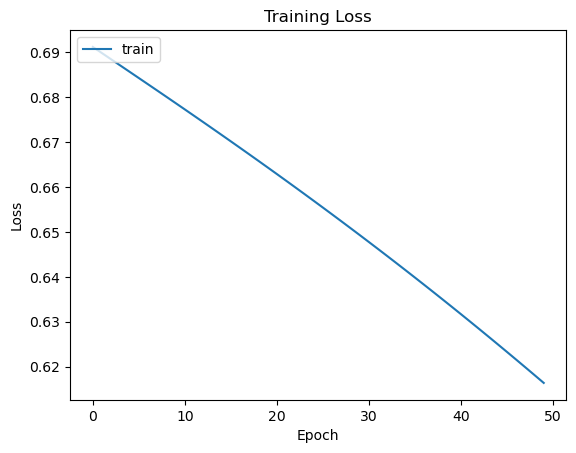

In [9]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# Define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

# Define class labels
labels = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# Integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

# Pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

# Define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))   #1 mạng neron

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
print(model.summary())

# Fit the model
history = model.fit(padded_docs, labels, epochs=50, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %.2f%%' % (accuracy * 100))

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_9 (Flatten)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3057 (11.94 KB)
Trainable params: 3057 (

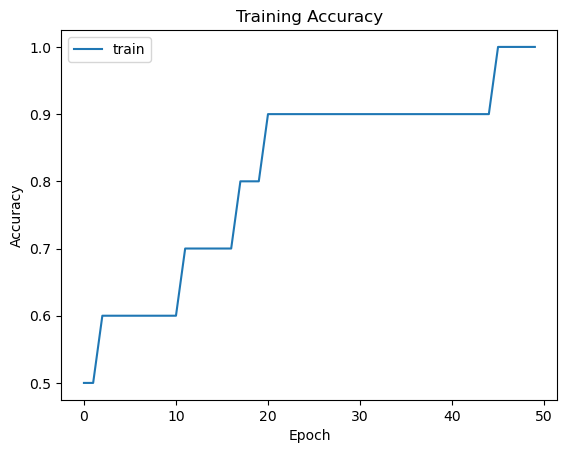

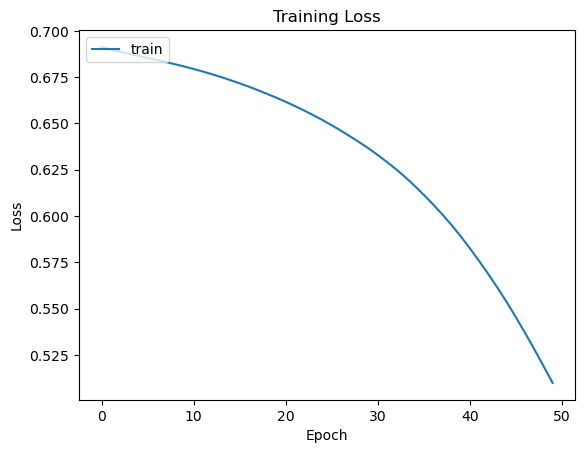

In [16]:
# Define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())

model.add(Dense(32, activation='relu'))  # Lớp ẩn với 12 đơn vị và hàm kích hoạt ReLU
model.add(Dense(32, activation='relu'))              # Lớp ẩn với 8 đơn vị và hàm kích hoạt ReLU để giúp mô hình phi tuyến tính
model.add(Dense(16, activation='relu'))    

model.add(Dense(1, activation='sigmoid')) # Lớp đầu ra với hàm kích hoạt Sigmoid để đổi đầu ra các giá trị trong khoảng từ 0 tới 1, phù hợp cho bài toán nhị phân


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
print(model.summary())

# Fit the model
history = model.fit(padded_docs, labels, epochs=50, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %.2f%%' % (accuracy * 100))

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 4, 8)              400       
                                                                 
 flatten_10 (Flatten)        (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 32)                544       
                                                                 
 dense_35 (Dense)            (None, 32)              

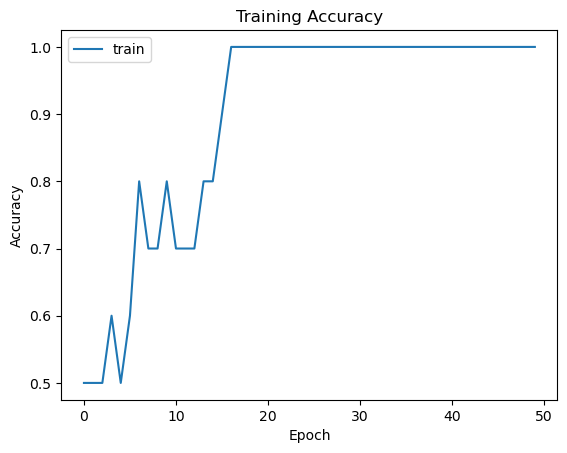

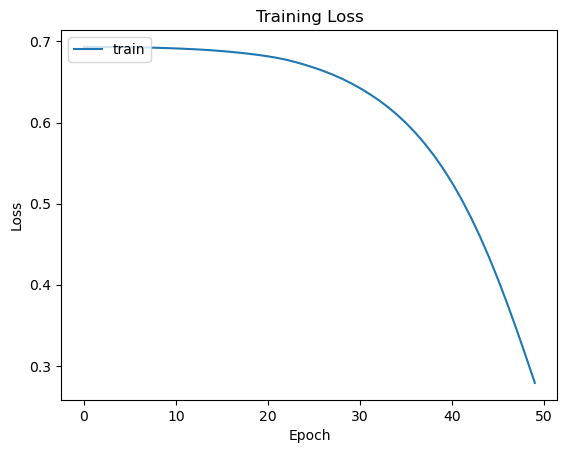

In [17]:
# Define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())

model.add(Dense(32, activation='relu'))  # Lớp ẩn với 12 đơn vị và hàm kích hoạt ReLU
model.add(Dense(32, activation='relu'))              # Lớp ẩn với 8 đơn vị và hàm kích hoạt ReLU để giúp mô hình phi tuyến tính
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))  # Lớp ẩn với 12 đơn vị và hàm kích hoạt ReLU
model.add(Dense(32, activation='relu'))              # Lớp ẩn với 8 đơn vị và hàm kích hoạt ReLU để giúp mô hình phi tuyến tính
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))  # Lớp ẩn với 12 đơn vị và hàm kích hoạt ReLU
model.add(Dense(32, activation='relu'))              # Lớp ẩn với 8 đơn vị và hàm kích hoạt ReLU để giúp mô hình phi tuyến tính
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # Lớp đầu ra với hàm kích hoạt Sigmoid để đổi đầu ra các giá trị trong khoảng từ 0 tới 1, phù hợp cho bài toán nhị phân


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
print(model.summary())

# Fit the model
history = model.fit(padded_docs, labels, epochs=50, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %.2f%%' % (accuracy * 100))

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()


# 6.3

Model 1 Summary:
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 10, 8)             8000      
                                                                 
 flatten_14 (Flatten)        (None, 80)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 81        
                                                                 
Total params: 8081 (31.57 KB)
Trainable params: 8081 (31.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Accuracy (Model 1): 80.0000011920929%
Model 2 Summary:
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 10, 8)         

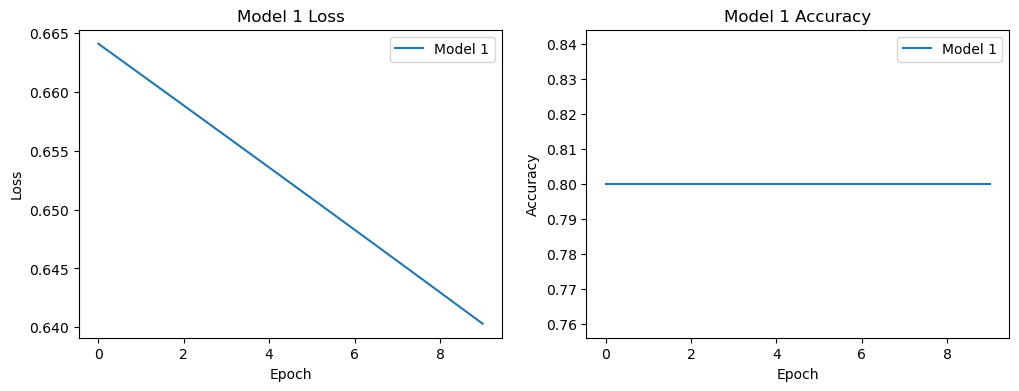

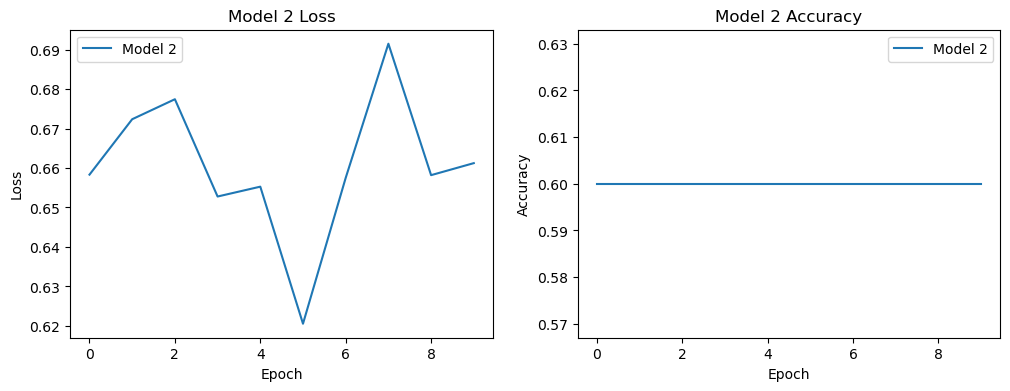

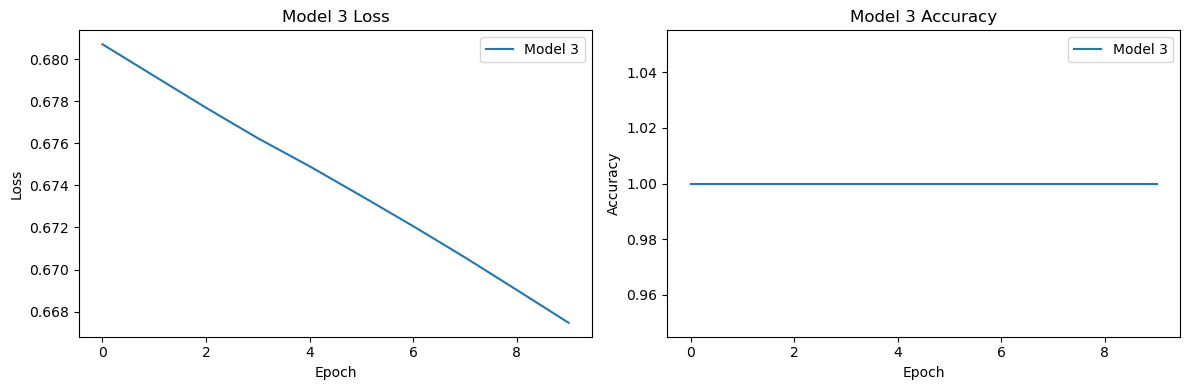

In [20]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Dữ liệu đánh giá nhà hàng và nhãn lớp (positive/negative)
reviews = ['The food was great!',
           'The service was terrible.',
           'I loved the ambiance.',
           'The food and service were excellent.',
           'Not a good experience.']

labels = np.array([1, 0, 1, 1, 0])

# Sử dụng Tokenizer để mã hóa văn bản thành các chuỗi số nguyên
max_words = 1000  # Số từ tối đa trong từ vựng
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Điền (padding) các chuỗi số nguyên để có độ dài tối đa
max_sequence_length = 10
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Xây dựng các mô hình mạng nơ-ron khác nhau

# Mô hình 1: Mô hình đơn giản
model1 = Sequential()
model1.add(Embedding(max_words, 8, input_length=max_sequence_length))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

# Mô hình 2: Mô hình với thêm lớp Dropout để tránh overfitting
model2 = Sequential()
model2.add(Embedding(max_words, 8, input_length=max_sequence_length))
model2.add(Flatten())
model2.add(Dense(4, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

# Mô hình 3: Mô hình với kiến trúc phức tạp hơn
model3 = Sequential()
model3.add(Embedding(max_words, 16, input_length=max_sequence_length))
model3.add(Flatten())
model3.add(Dense(8, activation='relu'))

model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

# Biên dịch và huấn luyện các mô hình
models = [model1, model2, model3]

for i, model in enumerate(models):
    print(f"Model {i + 1} Summary:")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    model.fit(padded_sequences, labels, epochs=10, verbose=0)
    loss, accuracy = model.evaluate(padded_sequences, labels, verbose=0)
    print(f"Accuracy (Model {i + 1}): {accuracy * 100}%")


# Số lượng mô hình
num_models = len(models)

# Biểu đồ loss và accuracy cho từng mô hình
for i, model in enumerate(models):
    # Huấn luyện mô hình (nếu chưa được huấn luyện)
    history = model.fit(padded_sequences, labels, epochs=10, verbose=0)
    
    # Lấy lịch sử (history) của mô hình
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    
    # Vẽ biểu đồ loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label=f'Model {i + 1}')
    plt.title(f'Model {i + 1} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Vẽ biểu đồ accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label=f'Model {i + 1}')
    plt.title(f'Model {i + 1} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()